## Exploring Data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# from sklearn.metrics import plot_roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
import keras



In [55]:
df = pd.read_csv('student_performance.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [13]:
df.shape

(2392, 15)

In [14]:
df.drop('StudentID', axis=1,inplace = True)
df.head()


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [15]:
df.shape

(2392, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB


In [17]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [23]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0


<ipython-input-21-734a7596d87f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-21-734a7596d87f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataframe[column])
<ipython-input-21-734a7596d87f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level func

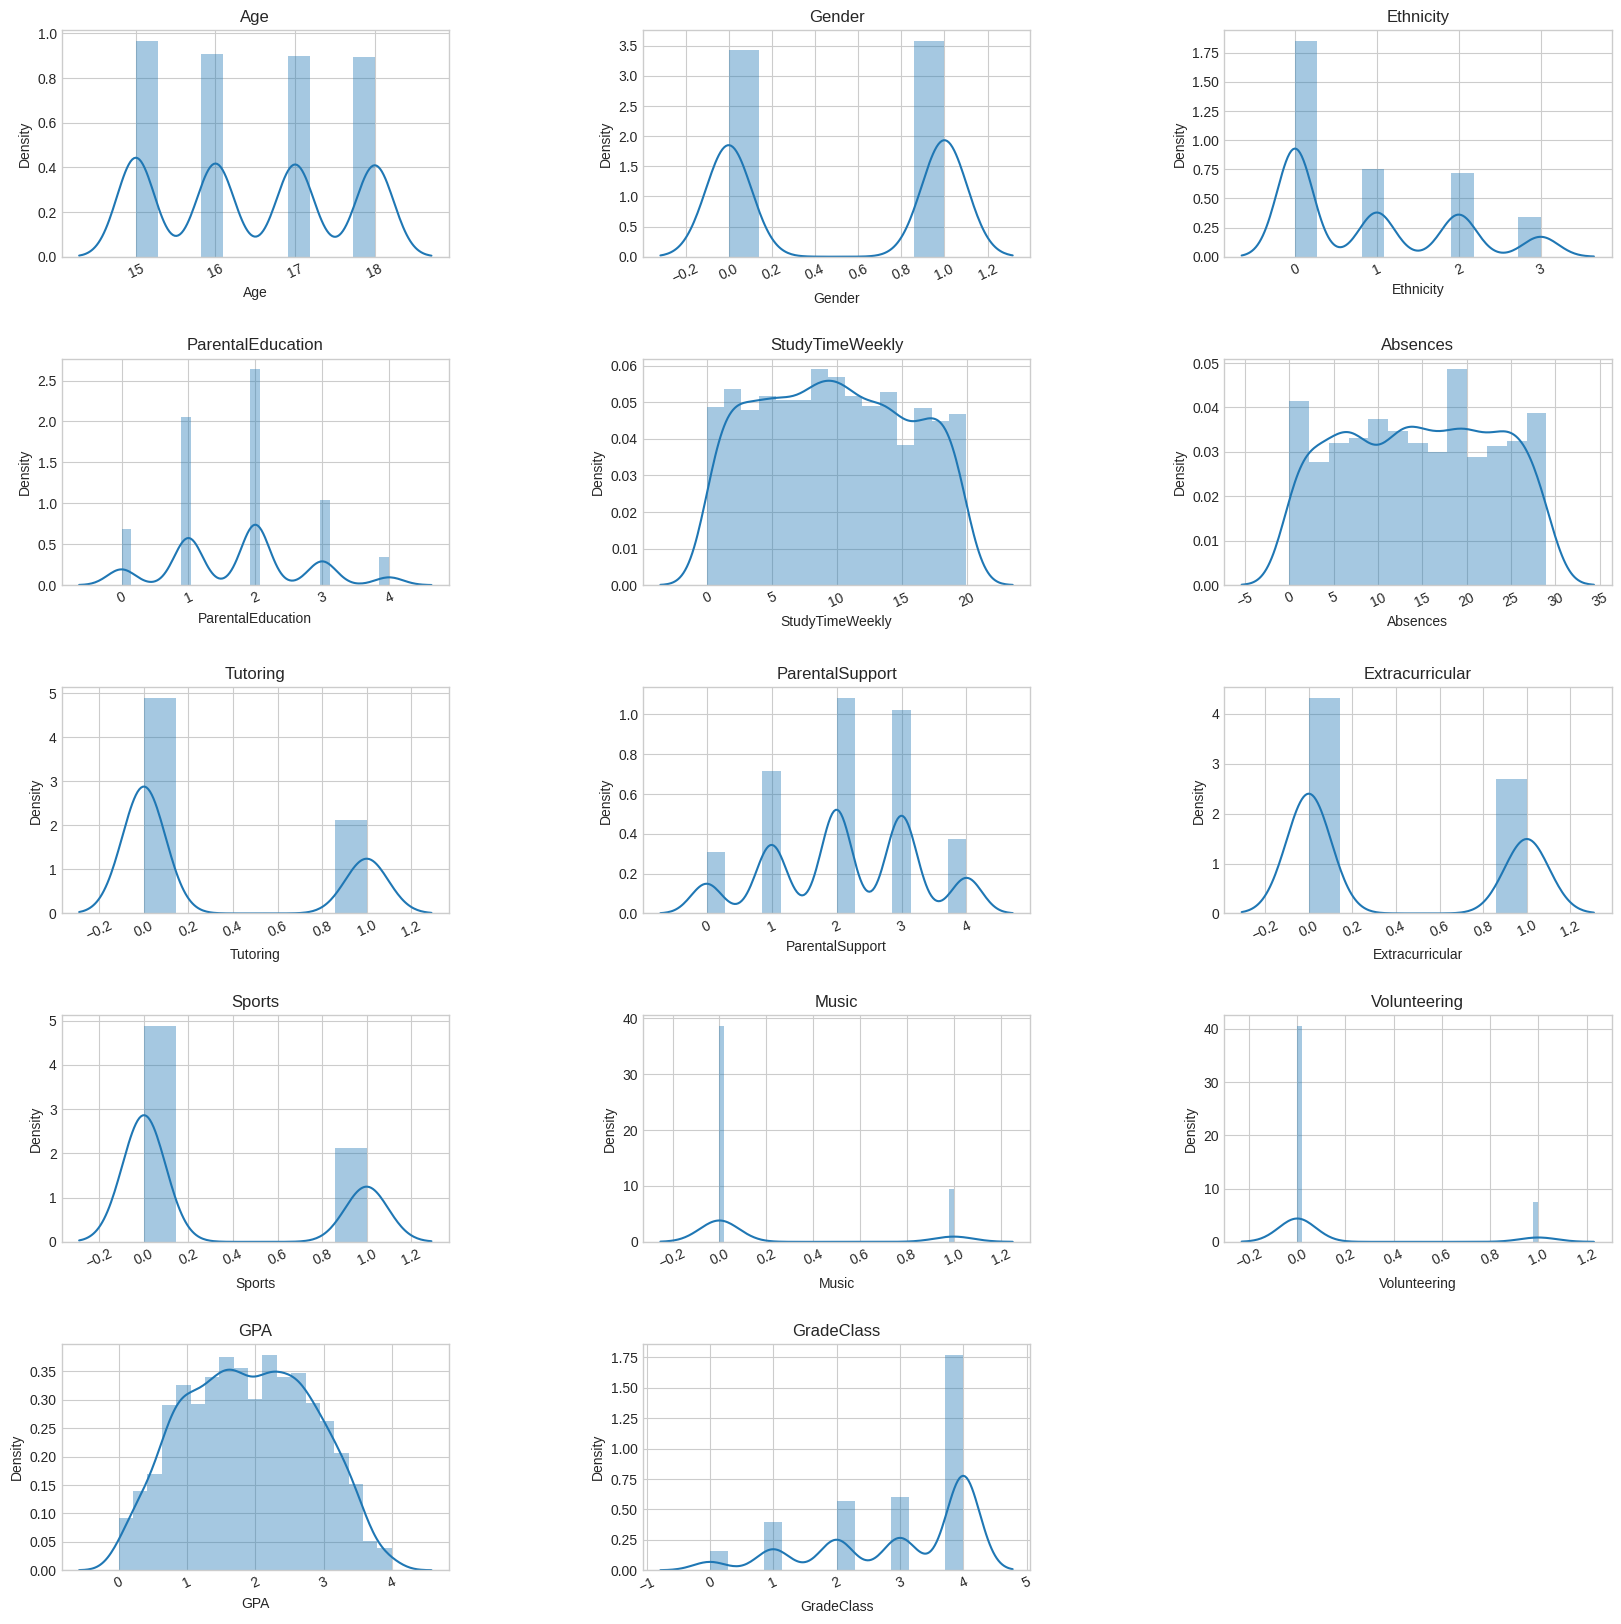

In [21]:
import matplotlib.pyplot as plt
import numpy as np
def plot_distribution(dataframe, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
  plt.style.use('seaborn-whitegrid')
  fig = plt.figure(figsize=(width,height))
  fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
  rows = math.ceil(float(dataframe.shape[1]) / cols)
  for i, column in enumerate(dataframe.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    g = sns.distplot(dataframe[column])
    plt.xticks(rotation=25)

plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)


 from the graph we have a class ImBalance Most of the students has a a low GPA .. GradClass is 4 less than 2 GPA

In [22]:

df['GradeClass'].value_counts()


,count
GradeClass,
4.0,1211
3.0,414
2.0,391
1.0,269
0.0,107


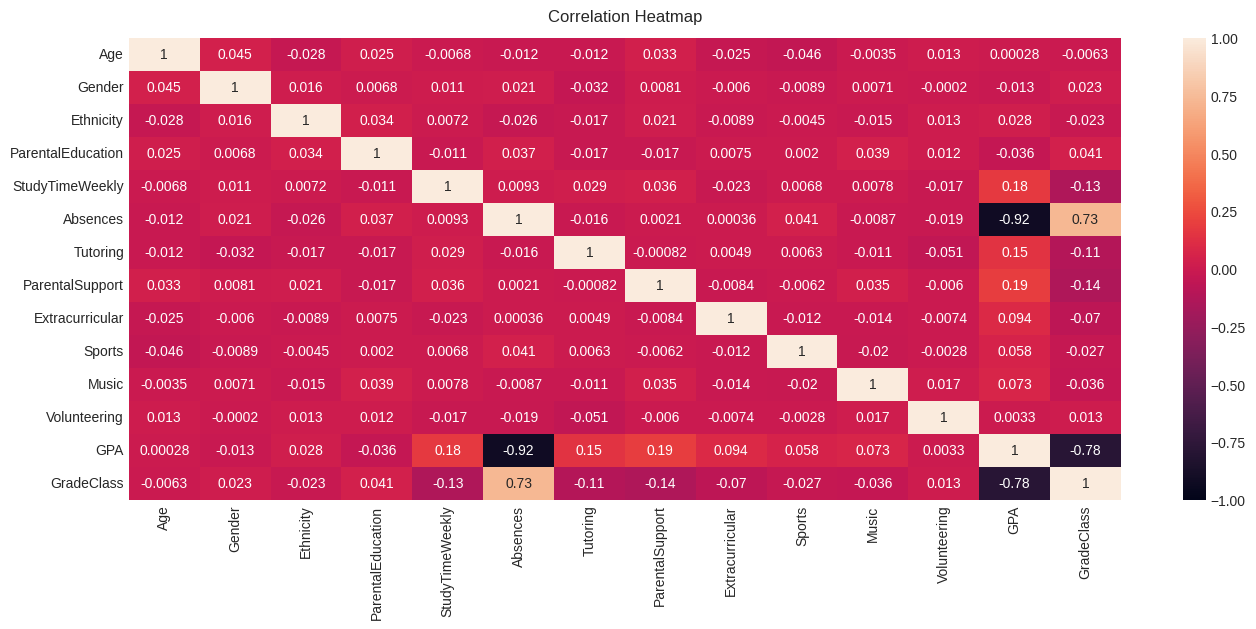

In [27]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


Strong negative Correlation between the absenses and the gpa

In [30]:
ethnicity_mapping = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parental_education_mapping = {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher'}
tutoring_mapping = {0: 'No', 1: 'Yes'}
parental_support_mapping = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
extracurricular_mapping = {0: 'No', 1: 'Yes'}
sports_mapping = {0: 'No', 1: 'Yes'}
music_mapping = {0: 'No', 1: 'Yes'}
volunteering_mapping = {0: 'No', 1: 'Yes'}

df_copy = pd.read_csv('student_performance.csv')
df_copy['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)
df_copy['ParentalEducation'] = df['ParentalEducation'].map(parental_education_mapping)
df_copy['Tutoring'] = df['Tutoring'].map(tutoring_mapping)
df_copy['ParentalSupport'] = df['ParentalSupport'].map(parental_support_mapping)
df_copy['Extracurricular'] = df['Extracurricular'].map(extracurricular_mapping)
df_copy['Sports'] = df['Sports'].map(sports_mapping)
df_copy['Music'] = df['Music'].map(music_mapping)
df_copy['Volunteering'] = df['Volunteering'].map(volunteering_mapping)

In [31]:
df_copy.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,1002,18,0,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,1.0
2,1003,15,0,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,4.0
3,1004,17,1,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,3.0
4,1005,17,1,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,4.0


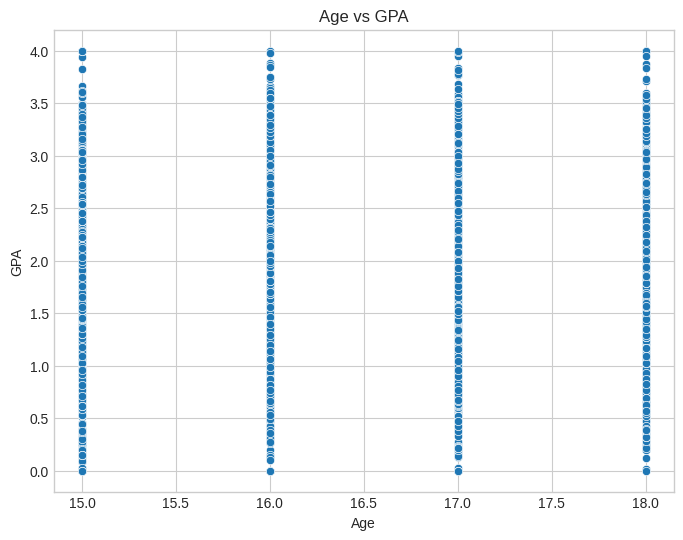

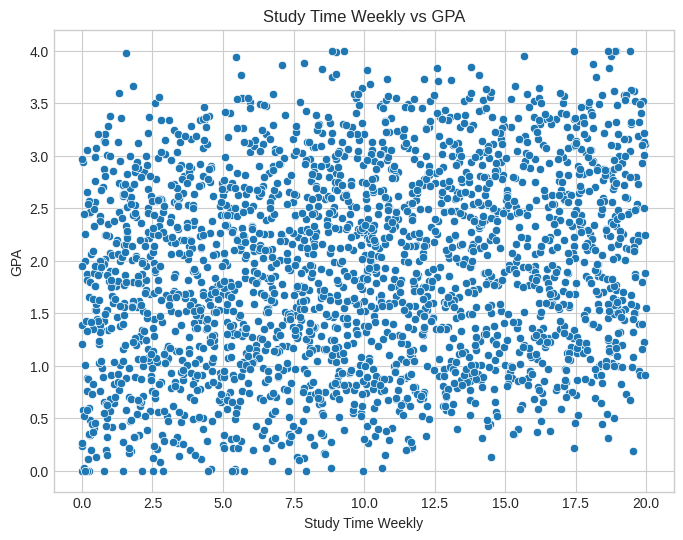

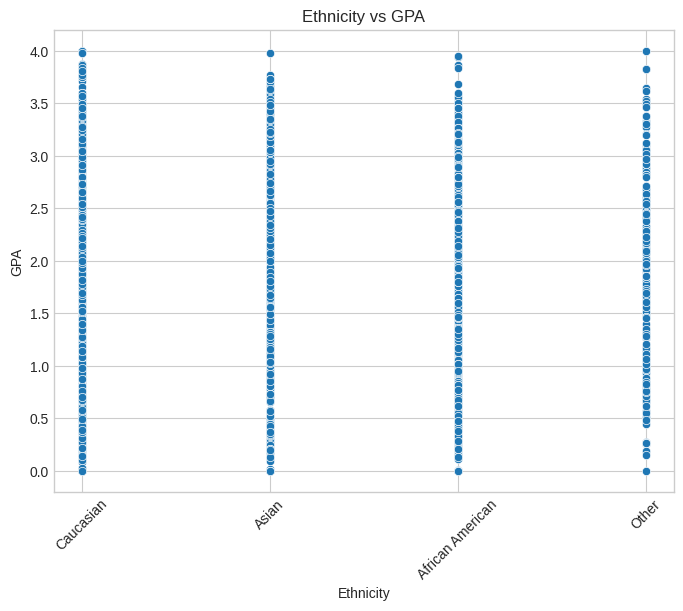

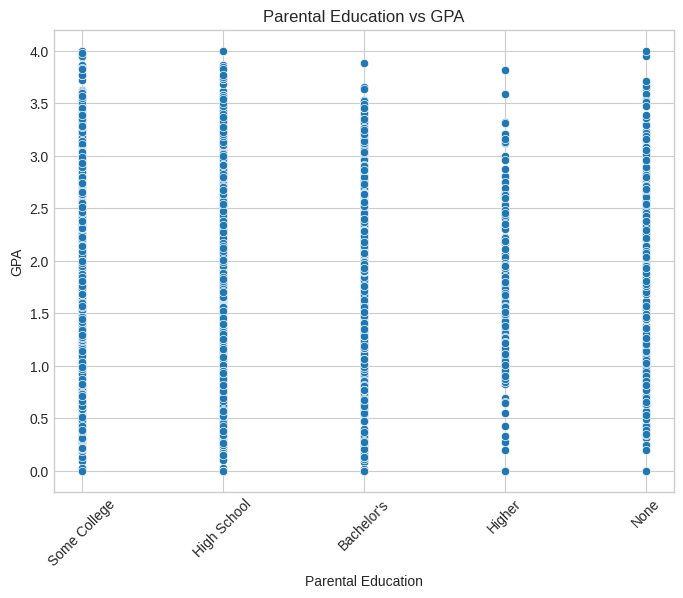

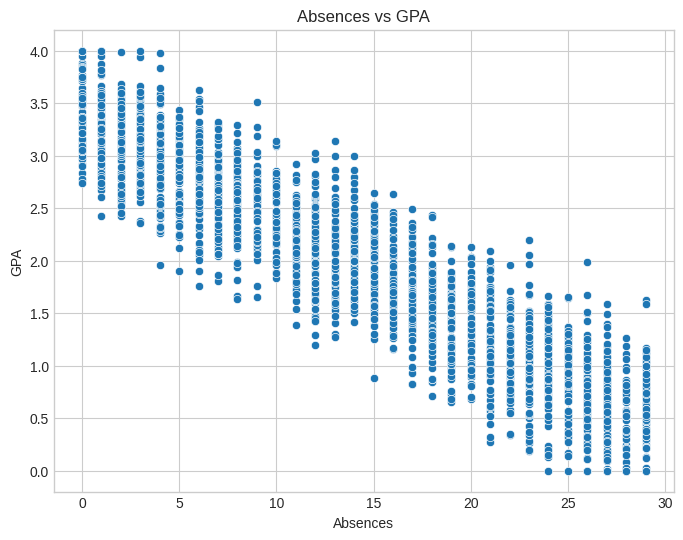

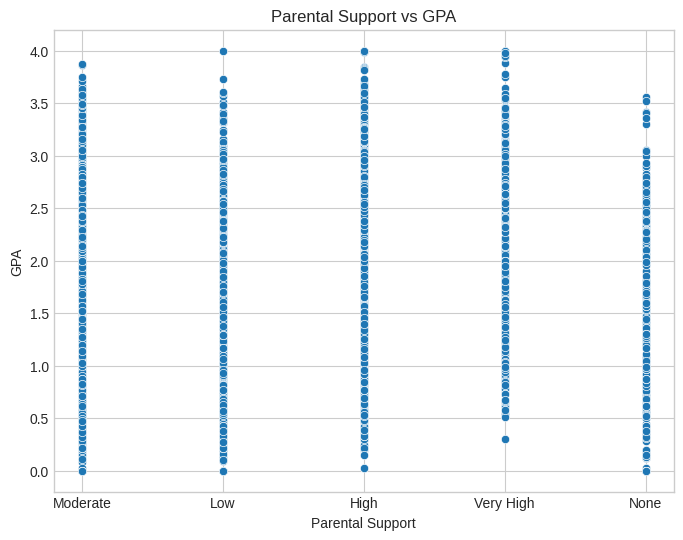

In [33]:
def analyze_factors(df):
  """
  Analyzes the relationship between various factors and GPA.

  Args:
    df: Pandas DataFrame containing student performance data.
  """

  # Age vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='Age', y='GPA', data=df)
  plt.title('Age vs GPA')
  plt.xlabel('Age')
  plt.ylabel('GPA')
  plt.show()

  # StudyTimeWeekly vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
  plt.title('Study Time Weekly vs GPA')
  plt.xlabel('Study Time Weekly')
  plt.ylabel('GPA')
  plt.show()

  # Ethnicity vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='Ethnicity', y='GPA', data=df)
  plt.title('Ethnicity vs GPA')
  plt.xlabel('Ethnicity')
  plt.ylabel('GPA')
  plt.xticks(rotation=45)
  plt.show()

  # Parental Education vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='ParentalEducation', y='GPA', data=df)
  plt.title('Parental Education vs GPA')
  plt.xlabel('Parental Education')
  plt.ylabel('GPA')
  plt.xticks(rotation=45)
  plt.show()

  # Absences vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='Absences', y='GPA', data=df)
  plt.title('Absences vs GPA')
  plt.xlabel('Absences')
  plt.ylabel('GPA')
  plt.show()

  # Parental Support vs GPA
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='ParentalSupport', y='GPA', data=df)
  plt.title('Parental Support vs GPA')
  plt.xlabel('Parental Support')
  plt.ylabel('GPA')
  plt.show()


analyze_factors(df_copy)


Absences seem to be our most important feature

Text(0.5, 1.0, 'GPA according to Ethnicity categorized by Age')

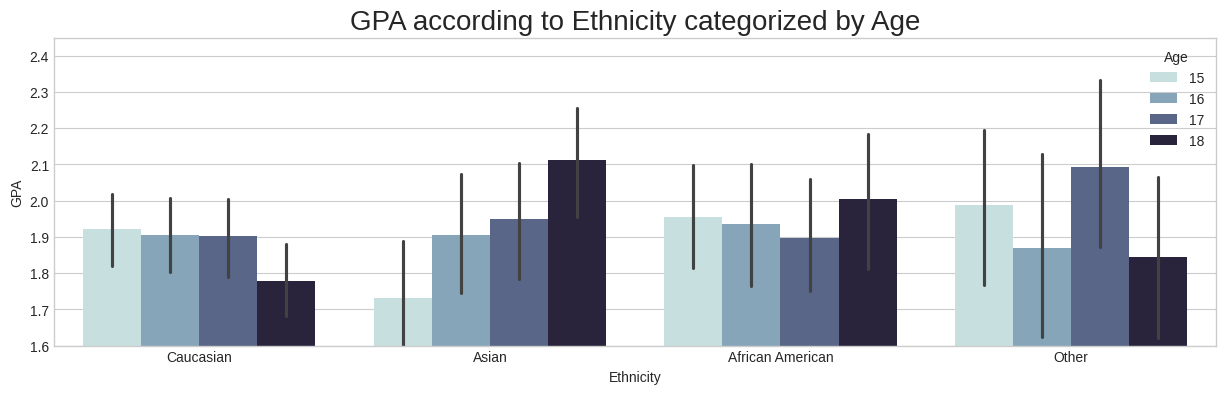

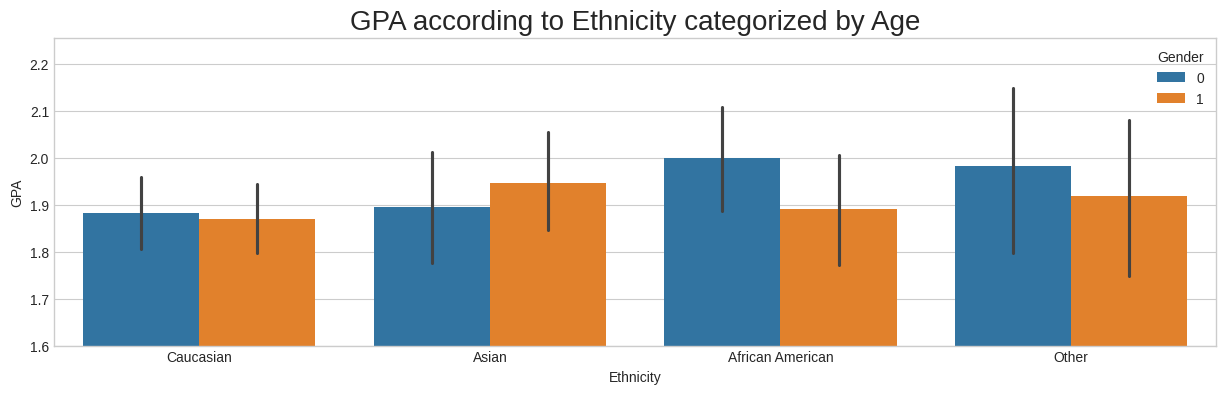

In [50]:
plt.figure(figsize = (15,4))
ethnic_gpa = sns.barplot(x = 'Ethnicity', y = 'GPA', hue = 'Age', data = df_copy, palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True) )
plt.ylim(bottom = 1.6)
plt.title("GPA according to Ethnicity categorized by Age", fontsize = 20)

plt.figure(figsize = (15,4))
ethnic_gpa = sns.barplot(x = 'Ethnicity', y = 'GPA', hue = 'Gender', data = df_copy )
plt.ylim(bottom = 1.6)
plt.title("GPA according to Ethnicity categorized by Age", fontsize = 20)


1) Age does not matter in most of the case ...it matters if u are an asian .older asian are doing better than younger asian students

2) Female Students have better results in average


## Data Preprocessing

In [51]:
df.drop('GPA', axis = 1, inplace = True)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [54]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0


In [56]:
x = df.drop(['GradeClass','GPA','StudentID'],axis = 1)
y = df['GradeClass']
x.shape,y.shape

((2392, 12), (2392,))

In [57]:
x.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0


In [58]:
scaler = StandardScaler()
features = ['StudyTimeWeekly', 'Absences', 'Age']
x[features] = scaler.fit_transform(x[features])


In [59]:
x.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,0.472919,1,0,2,1.780336,-0.890822,1,2,0,0,1,0
1,1.362944,0,0,1,0.997376,-1.717694,0,1,0,0,0,0
2,-1.307132,0,2,3,-0.984045,1.353542,0,2,0,0,0,0
3,0.472919,1,0,3,0.045445,-0.063951,0,3,1,0,0,0
4,0.472919,1,0,2,-0.902311,0.290422,1,3,0,0,0,0


In [61]:
y = y.astype(int)
y.head()

,GradeClass
0,2
1,1
2,4
3,3
4,4


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((1674, 12), (718, 12), (1674,), (718,))

# Building ML Models

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.700557   0.682264  0.700557  0.682402
1                  SVM  0.699164   0.661312  0.699164  0.678881
2  K-Nearest Neighbors  0.608635   0.585702  0.608635  0.594817
3  Logistic Regression  0.688022   0.651356  0.688022  0.661904
4        Decision Tree  0.591922   0.602567  0.591922  0.596440
5          Naive Bayes  0.646240   0.613147  0.646240  0.622018


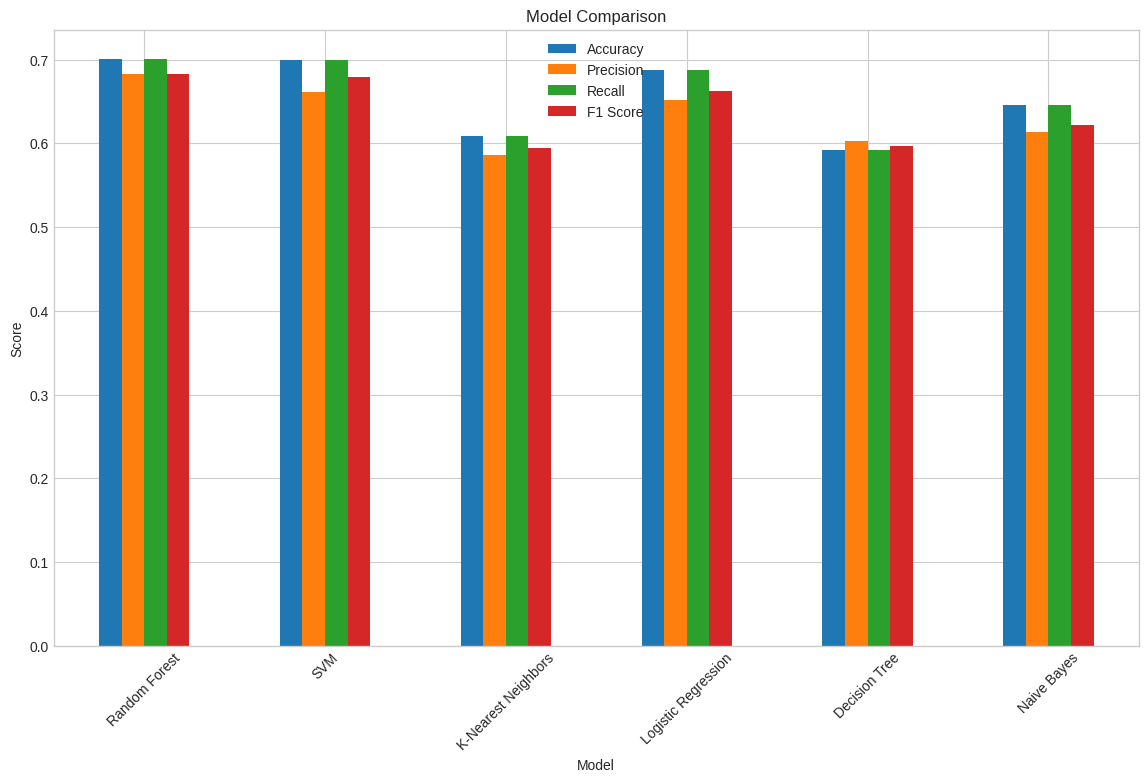

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
# List of models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize a dictionary to store the metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],

}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)


    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    # Store the metrics
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)


# Convert metrics dictionary to DataFrame for easier comparison
metrics_df = pd.DataFrame(metrics)

# Display the metrics DataFrame
print(metrics_df)

# Plot the metrics for comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(14, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


**Support Vector Machine & Random Forrest acheiving good results comparing to others**

# Building NN

do the one hot encoder on the y_train and y_test

In [86]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_train_cat.shape , y_test_cat.shape


((1674, 5), (718, 5))

In [89]:
y_train_cat[:5],y_train[:5]

(array([[0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]),
 380     2
 226     4
 1075    3
 715     4
 1822    4
 Name: GradeClass, dtype: int64)

In [144]:
## preferable number of neurons to be in the for of 2^i
## preferable that layers distribution to be  :
KerasModel = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(5, activation='softmax')
])

In [145]:
KerasModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy']) # matrix

In [146]:
history = KerasModel.fit(x_train ,y_train_cat,
                         validation_split  = 0.3 ,
                         epochs= 50 ,
                         batch_size=1,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])


Epoch 1/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5084 - loss: 1.2683 - val_accuracy: 0.5885 - val_loss: 1.1232
Epoch 2/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6199 - loss: 1.0001 - val_accuracy: 0.6282 - val_loss: 0.9796
Epoch 3/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6527 - loss: 0.9195 - val_accuracy: 0.6938 - val_loss: 0.9338
Epoch 4/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6945 - loss: 0.8730 - val_accuracy: 0.7018 - val_loss: 0.9157
Epoch 5/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6832 - loss: 0.9157 - val_accuracy: 0.6720 - val_loss: 0.9315
Epoch 6/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7192 - loss: 0.8155 - val_accuracy: 0.6958 - val_loss: 0.8979
Epoch 7/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6947 - loss: 0.8490 - val_accuracy: 0.6879 - val_loss: 0.9633
Epoch 8/50
1171/1171 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7162 - loss: 0.8412 -

In [147]:
print(KerasModel.summary())

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (1, 128)                    │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (1, 128)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (1, 64)                     │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (1, 64)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (1, 32)                     │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (1, 32)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (1, 5)                      │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,497 (142.57 KB)

 Trainable params: 12,165 (47.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,332 (95.05 KB)

None


In [148]:
KerasModel.save('KerasModel.model.h5')

# Evaluation

In [149]:
NewKerasModel = keras.models.load_model('KerasModel.model.h5')

In [150]:
y_pred = NewKerasModel.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [151]:
y_pred[:5] , y_test_cat[:5]

(array([[2.60995906e-02, 5.59295975e-02, 1.83927342e-02, 8.00311491e-02,
         8.19546878e-01],
        [7.35053942e-02, 3.15935582e-01, 5.57200491e-01, 4.80951294e-02,
         5.26339980e-03],
        [6.87507819e-03, 2.69866120e-02, 1.22085689e-02, 1.36158988e-01,
         8.17770660e-01],
        [3.73282224e-01, 5.12853444e-01, 1.11887366e-01, 1.51621446e-03,
         4.60844079e-04],
        [8.88229581e-04, 1.59384124e-02, 5.82407702e-05, 1.23295948e-04,
         9.82991695e-01]], dtype=float32),
 array([[0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.]]))

In [152]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(x_test, y_test_cat)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7239 - loss: 0.7943  
Model Loss is 0.7773122787475586
Model Accuracy is 0.7339832782745361


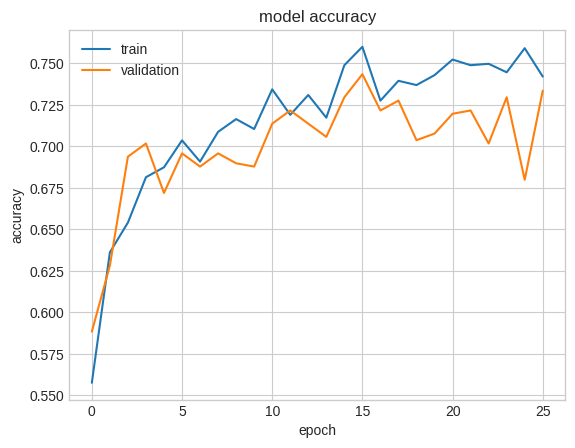

In [153]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

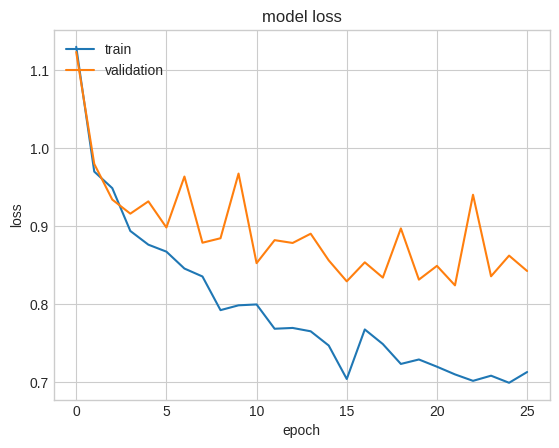

In [154]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Make a prediction

In [158]:
hardworking_student = {
    'Age': 0.472919,            # Assume a typical age (standardized value)
    'Gender': 1,                # Assume male (0 for female)
    'Ethnicity': 0,             # Assume one of the categories
    'ParentalEducation': 4,     # Higher education level
    'StudyTimeWeekly': 1.780336, # High study time (standardized value)
    'Absences': -1.717694,      # Low absences (standardized value)
    'Tutoring': 1,              # Receiving tutoring
    'ParentalSupport': 4,       # High parental support
    'Extracurricular': 1,       # High involvement in extracurricular activities
    'Sports': 1,                # Participates in sports
    'Music': 1,                 # Participates in music
    'Volunteering': 1           # Participates in volunteering
}
hardworking_student_df = pd.DataFrame([hardworking_student])


In [157]:
## A hardworking student receiving a 0 classgrade
prediction = NewKerasModel.predict(hardworking_student_df)
print("Predicted class probabilities:", prediction)
predicted_class = prediction.argmax(axis=1)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class probabilities: [[5.3451526e-01 4.4751436e-01 1.7946241e-02 1.9266950e-05 4.9013324e-06]]
Predicted class: [0]
